In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from utils import*
from experiments import*
from networks import*

In [2]:
# Create a DataLoader
train_dataset,test_dataset = load_mnist(None) # first we load 2000 random digits for the training
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,num_workers=8,pin_memory=True,collate_fn=one_hot_collate)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False,num_workers=8,pin_memory=True,collate_fn=one_hot_collate)

In [9]:
pretrain_set = [i[0] for i in train_dataset]
digits_test = torch.stack(pretrain_set).float()

In [10]:
device =  torch.device('cuda')
pretraining_args = Args(
     n_steps = 100,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     batch_size = 128 ,
)
training_args = Args(
     lr = 1e-4,
     n_epochs = 30,
     train_loader = train_loader,
     test_loader = test_loader,
     device = device
    )
num_classes = 10
input_size = 784
history = {"accuracy":[], "pretrained_accuracy":[]}

In [11]:
for i,n_layers in enumerate(range(2,11)):
    hidden_sizes = [300 for _ in range(n_layers)]
    print("\nConfig {}".format(i+1))
    model,pretrain_model = get_config(input_size=input_size,
                                        num_classes=num_classes,
                                        layer_config=hidden_sizes,
                                     device=device)
    accuracy,pretrain_accuracy = run_experiment(model=model,
                                            pretrain_model=pretrain_model,
                                            training=training_args,
                                            pretraining=pretraining_args)
    history['accuracy'].append(accuracy)
    history['pretrained_accuracy'].append(pretrain_accuracy)


Config 1
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:21<00:00,  2.72s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:07<00:00, 63.78s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:18<00:00,  2.62s/it]

[INFO] Evaluating models 



Config 2
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:21<00:00,  2.73s/it]


[INFO] Pretraining  model 2 


100%|██████████| 3/3 [03:13<00:00, 64.64s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:20<00:00,  2.69s/it]

[INFO] Evaluating models 



Config 3
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:25<00:00,  2.84s/it]


[INFO] Pretraining  model 2 


100%|██████████| 4/4 [04:21<00:00, 65.46s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:27<00:00,  2.93s/it]

[INFO] Evaluating models 



Config 4
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:31<00:00,  3.05s/it]


[INFO] Pretraining  model 2 


100%|██████████| 5/5 [05:28<00:00, 65.68s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:28<00:00,  2.96s/it]

[INFO] Evaluating models 



Config 5
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:34<00:00,  3.15s/it]


[INFO] Pretraining  model 2 


100%|██████████| 6/6 [06:34<00:00, 65.78s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:32<00:00,  3.08s/it]

[INFO] Evaluating models 



Config 6
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:38<00:00,  3.27s/it]


[INFO] Pretraining  model 2 


100%|██████████| 7/7 [07:44<00:00, 66.35s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:37<00:00,  3.24s/it]

[INFO] Evaluating models 



Config 7
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:44<00:00,  3.47s/it]


[INFO] Pretraining  model 2 


100%|██████████| 8/8 [08:52<00:00, 66.57s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:44<00:00,  3.50s/it]

[INFO] Evaluating models 



Config 8
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:50<00:00,  3.70s/it]


[INFO] Pretraining  model 2 


100%|██████████| 9/9 [10:05<00:00, 67.32s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:52<00:00,  3.74s/it]

[INFO] Evaluating models 



Config 9
[INFO] training model 1 from scratch


100%|██████████| 10/10 [11:13<00:00, 67.33s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:59<00:00,  3.98s/it]

[INFO] Evaluating models 


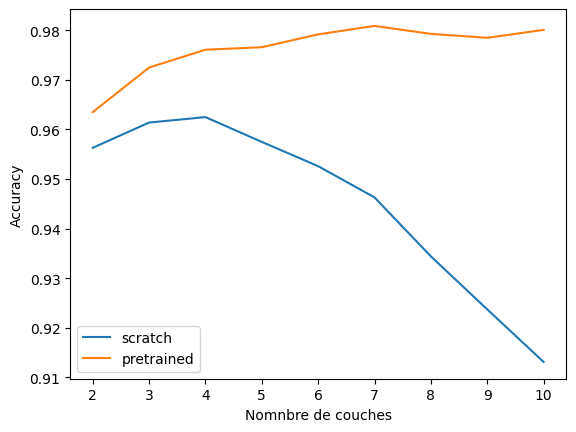

In [ ]:
plt.plot(range(2,11),history['accuracy'],label="scratch")
plt.plot(range(2,11),history['pretrained_accuracy'],label="pretrained")
plt.xlabel('Nomnbre de couches')
plt.ylabel('Accuracy')
plt.legend()